#Data Cleaning for Utility Relation

In [0]:
#Import Pandas and Numpy for data frames and data types
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

0.25.3
1.18.2


In [0]:
#Import visual plotting and mapping libraries.
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
#Import seaborn to visualize missing data.
import seaborn as sns

#Tutorial References

**Handling Null Values**
\
Medium article on how to define null characters list: https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f
Ultimate Data Cleaning Guide on Medium: https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
\
\
**Numpy Data Reference**
\
Numpy Data Types List: https://numpy.org/devdocs/user/basics.types.html
\
\
**Pandas Dataframe Reference**
\
Defining converters for datatypes: https://stackoverflow.com/questions/32591466/python-pandas-how-to-specify-data-types-when-reading-an-excel-file

#Utility - Reading in Intial Spreadsheets

##2018 Utility Table

In [1]:
#Define column names to use in a python list.  Match order to the column order in spreadsheet.
utility2018_columns = ['util_ID',
                       'util_name',
                       'street_address',
                       'city',
                       'state',
                       'zip',
                       'entity_type_id']
#Define datatypes to use for the columns.  Specified in the form of a converter.
utility2018_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'street_address':str,
                            'city':str,
                            'state':str,
                            'zip':str,
                            'entity_type_id':str}

#Read in excel sheet to Pandas Dataframe.
utility2018 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/Utility_Y2018.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'Utility',  #Define the sheet we are reading data from.
                            skiprows = 1,  #Number of rows to skip to get to column headers.
                            usecols = 'A:F,K',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = utility2018_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = utility2018_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


NameError: ignored

In [0]:
#Output data type columns.  Strings show as objects for some reason...
print(utility2018.dtypes)

util_name         object
street_address    object
city              object
state             object
zip               object
entity_type_id    object
dtype: object


In [0]:
#Display the first 1000 rows.
utility2018.head(1000)

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
7,Tate & Lyle Ingredients Americas Inc,2200 East Eldorado Street,Decatur,IL,62525,IND
8,Tate & Lyle Ingredients Americas Inc,2245 Sagamore Parkway North,Lafayette,IN,47904,IND
21,AES Shady Point LLC,P O Box 1740,Panama,OK,74951,Q
25,Greenidge Generation Holdings LLC,PO Box 187590 Plant Rd,Dresden,NY,14441,Q
34,City of Abbeville - (SC),P O Box 639,Abbeville,SC,29620,M
...,...,...,...,...,...,...
13964,Oconto Electric Cooperative,7479 REA Road,Oconto Falls,WI,54154,C
13982,Ogden Projects Inc-Haverhill,445 South Street,Morristown,NJ,7960,COM
13989,California Resources Elk Hills LLC,P O Box 100128590 Highway 119,Tupman,CA,93276,IND


###Analyzing Null Values

In [0]:
#Display columns with null values
utility2018.isnull().any()

#Make list of columns with null values
#utility2018.columns[utility2018.isna().any()].tolist()

util_name         False
street_address    False
city              False
state              True
zip                True
entity_type_id    False
dtype: bool

In [0]:
#Check null values in state.
utility2018[utility2018.state.isnull()]

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
44466,BP PLC,One Finsbury Circus,London,NaN,NaN,IND


In [0]:
#Check null values in zip
utility2018[utility2018.zip.isnull()]

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
44466,BP PLC,One Finsbury Circus,London,NaN,NaN,IND


In [0]:
utility2018.loc[[44466, 8],:]

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
44466,BP PLC,One Finsbury Circus,London,NaN,NaN,IND
8,Tate & Lyle Ingredients Americas Inc,2245 Sagamore Parkway North,Lafayette,IN,47904,IND


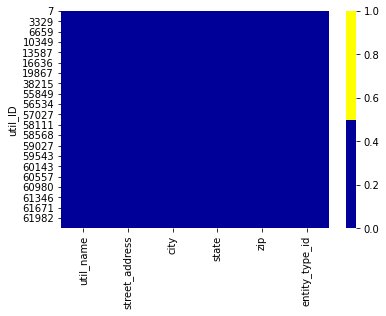

In [0]:
#Create heat map to visualize large clusters of missing data.

#Define colors for heat map.
missingDataColors = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
#Use seaborn to create heat map.
sns.heatmap(utility2018.isnull(),cmap=sns.color_palette(missingDataColors))

##2017 Utility Table

In [0]:
#Define column names to use in a python list.  Match order to the column order in spreadsheet.
utility2017_columns = ['util_ID',
                       'util_name',
                       'street_address',
                       'city',
                       'state',
                       'zip',
                       'entity_type_id']
#Define datatypes to use for the columns.  Specified in the form of a converter.
utility2017_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'street_address':str,
                            'city':str,
                            'state':str,
                            'zip':str,
                            'entity_type_id':str}

#Read in excel sheet to Pandas Dataframe.
utility2017 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/1___Utility_Y2017.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'Utility',  #Define the sheet we are reading data from.
                            skiprows = 1,  #Number of rows to skip to get to column headers.
                            usecols = 'A:F,K',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = utility2017_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = utility2017_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


In [0]:
#Output data type columns.  Strings show as objects for some reason...
print(utility2017.dtypes)

util_name         object
street_address    object
city              object
state             object
zip               object
entity_type_id    object
dtype: object


In [0]:
#Display the first 1000 rows.
utility2017.head(1000)

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
7,Tate & Lyle Ingredients Americas Inc,2200 East Eldorado Street,Decatur,IL,62525,IND
8,Tate & Lyle Ingredients Americas Inc,2245 Sagamore Parkway North,Lafayette,IN,47904,IND
21,AES Shady Point LLC,P O Box 1740,Panama,OK,74951,Q
25,Greenidge Generation Holdings LLC,PO Box 187590 Plant Rd,Dresden,NY,14441,Q
34,City of Abbeville - (SC),P O Box 639,Abbeville,SC,29620,M
...,...,...,...,...,...,...
13831,City of Norwich - (CT),16 South Golden Street,Norwich,CT,6360,M
13833,Northeastern Power Co,1177 West Loop South Ste 900,Houston,TX,77027,Q
13866,NWP Indian Mesa Wind Farm LP,Attn: Business Mgr700 Universe,Juno Beach,FL,33408,Q


###Analyzing Null Values

In [0]:
#Display columns with null values
utility2017.isnull().any()

#Make list of columns with null values
#utility2018.columns[utility2018.isna().any()].tolist()

util_name         False
street_address     True
city              False
state             False
zip               False
entity_type_id     True
dtype: bool

In [0]:
#Check null values in street_address.
utility2017[utility2017.street_address.isnull()]

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
58789,DOD USMC Marine Air Ground Combat,NaN,Twentynine Palms,CA,92278,F


In [0]:
#Check null values in entity_type_id.
utility2017[utility2017.entity_type_id.isnull()]

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
6389,FirstEnergy Generation Corp,341 White Pond Dr,Akron,OH,44320,NaN
6458,First Energy Solutions Corp.,341 White Pond DrA-WAC-B2,Akron,OH,44320,NaN
11586,Town of Mansfield - (MA),125 High St.,Mansfield,MA,2048,NaN
12825,NorthWestern Energy LLC - (MT),11 East Park,Butte,MT,59701,NaN
18102,"Steuben Rural Elec Coop, Inc",9 Wilson Avenue,Bath,NY,14810,NaN
19107,ENGIE Resources LLC,1990 Post Oak Blvd.Suite 1900,Houston,TX,77056,NaN
20472,"Wharton County Elec Coop, Inc",1815 East Jackson,EL Campo,TX,77437,NaN
20521,Wheeling Power Co,1 Riverside Plaza,Columbus,OH,43215,NaN


##2016 Utility Table

In [0]:
#Define column names to use in a python list.  Match order to the column order in spreadsheet.
utility2016_columns = ['util_ID',
                       'util_name',
                       'street_address',
                       'city',
                       'state',
                       'zip',
                       'entity_type_id']
#Define datatypes to use for the columns.  Specified in the form of a converter.
utility2016_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'street_address':str,
                            'city':str,
                            'state':str,
                            'zip':str,
                            'entity_type_id':str}

#Read in excel sheet to Pandas Dataframe.
utility2016 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/1___Utility_Y2016.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'Utility',  #Define the sheet we are reading data from.
                            skiprows = 1,  #Number of rows to skip to get to column headers.
                            usecols = 'A:F,K',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = utility2016_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = utility2016_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


In [0]:
#Display the first 1000 rows.
utility2016.head(10)

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
7,Tate & Lyle Ingredients Americas Inc,2200 East Eldorado Street,Decatur,IL,62525,IND
8,Tate & Lyle Ingredients Americas Inc,2245 Sagamore Parkway North,Lafayette,IN,47904,IND
21,AES Shady Point LLC,P O Box 1740,Panama,OK,74951,Q
25,Greenidge Generation Holdings LLC,PO Box 187590 Plant Rd,Dresden,NY,14441,Q
34,City of Abbeville - (SC),P O Box 639,Abbeville,SC,29620,M
35,AES WR Ltd Partnership,11600 Mexico Farms Road,Cumberland,MD,21502,Q
82,Ada Cogeneration Ltd Partnership,c/o White Pine Energy LLC67 Pa,Morristown,NJ,7960,Q
84,A & N Electric Coop,PO Box 29021275 Cooperative Wa,Tasley,VA,23441,C
88,Granite Ridge Energy LLC,21 North Wentworth Ave,Londonderry,NH,3053,Q


###Analyzing Null Values

In [0]:
#Display columns with null values
utility2016.isnull().any()

#Make list of columns with null values
#utility2018.columns[utility2018.isna().any()].tolist()

util_name         False
street_address     True
city               True
state              True
zip                True
entity_type_id    False
dtype: bool

In [0]:
#Print all rows with null values
utility2016[utility2016.isnull().any(axis=1)]

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
14584,Pawtucket Power Associates LP,715 - 5 Avenue S.W. Suite 1210,"Calgary, Alberta, Canada",NaN,T2P,Q
23931,Resolute Forest Products,111 Duke Street,Montreal,QC,NaN,IND
54736,AltaGas Pomona Energy Inc.,222 3rd Avenue,Calgary,AB,NaN,Q
55941,Northbrook Lyons Falls LLC,3285 Bedford Road,"Montreal, Quebec H3S 1G5",CN,NaN,Q
56730,Cedar Bay Operating Services LLC,NaN,Charlotte,NC,28273,Q
56773,"Toyon Landfill Gas Conversion, LLC",NaN,NaN,CA,NaN,Q
56837,KEI (Maine) Power Management (II) LLC,"3285, chemin Bedford","Montreal, Quebec H3S 1G5",NaN,NaN,Q
56839,KEI (Maine) Power Management (IV) LLC,"3285, chemin Bedford","Montreal, Quebec H3S 1G5",NaN,NaN,Q
56840,Emporia Hydro Power LP,"3285, chemin Bedford","Montreal, Quebec H3S 1G5",NaN,NaN,Q


##2015-2013 Utility Tables

In [0]:
#2015

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
utility2015_columns = ['util_ID',
                       'util_name',
                       'street_address',
                       'city',
                       'state',
                       'zip',
                       'entity_type_id']
#Define datatypes to use for the columns.  Specified in the form of a converter.
utility2015_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'street_address':str,
                            'city':str,
                            'state':str,
                            'zip':str,
                            'entity_type_id':str}

#Read in excel sheet to Pandas Dataframe.
utility2015 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/1___Utility_Y2016.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'Utility',  #Define the sheet we are reading data from.
                            skiprows = 1,  #Number of rows to skip to get to column headers.
                            usecols = 'A:F,K',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = utility2015_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = utility2015_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )

In [0]:
#2014

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
utility2014_columns = ['util_ID',
                       'util_name',
                       'street_address',
                       'city',
                       'state',
                       'zip',
                       'entity_type_id']
#Define datatypes to use for the columns.  Specified in the form of a converter.
utility2014_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'street_address':str,
                            'city':str,
                            'state':str,
                            'zip':str,
                            'entity_type_id':str}

#Read in excel sheet to Pandas Dataframe.
utility2014 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/1___Utility_Y2016.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'Utility',  #Define the sheet we are reading data from.
                            skiprows = 1,  #Number of rows to skip to get to column headers.
                            usecols = 'A:F,K',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = utility2014_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = utility2014_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )

In [0]:
#2013

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
utility2013_columns = ['util_ID',
                       'util_name',
                       'street_address',
                       'city',
                       'state',
                       'zip',
                       'entity_type_id']
#Define datatypes to use for the columns.  Specified in the form of a converter.
utility2013_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'street_address':str,
                            'city':str,
                            'state':str,
                            'zip':str,
                            'entity_type_id':str}

#Read in excel sheet to Pandas Dataframe.
utility2013 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/1___Utility_Y2016.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'Utility',  #Define the sheet we are reading data from.
                            skiprows = 1,  #Number of rows to skip to get to column headers.
                            usecols = 'A:F,K',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = utility2013_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = utility2013_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )

#Utility - Combining Tables

##Combine 2018 to 2017

Attempting to use combine_first provided by pandas dataframes to prioritize the calling dataframe and fill in missing values or add rows not in the calling dataframe.  Must have the same schema and index structure.  Those values in the calling dataframe that are also in the called dataframe will default to the calling dataframe.

In [0]:
#Print shape of dataframes before merging.
print(utility2018.shape)
print(utility2017.shape)

(5039, 6)
(4674, 6)


In [0]:
#Attempt using combine_first
utility_2018_to_2017 = utility2018.combine_first(utility2017)

In [0]:
#output combined dataframe.  Sorting before outputting.
utility_2018_to_2017 = utility_2018_to_2017.sort_index(ascending = True)
utility_2018_to_2017

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
7,Tate & Lyle Ingredients Americas Inc,2200 East Eldorado Street,Decatur,IL,62525,IND
8,Tate & Lyle Ingredients Americas Inc,2245 Sagamore Parkway North,Lafayette,IN,47904,IND
21,AES Shady Point LLC,P O Box 1740,Panama,OK,74951,Q
25,Greenidge Generation Holdings LLC,PO Box 187590 Plant Rd,Dresden,NY,14441,Q
34,City of Abbeville - (SC),P O Box 639,Abbeville,SC,29620,M
...,...,...,...,...,...,...
62778,"Rattlesnake Flat, LLC",100 California St Suite 400,San Francisco,CA,94118,Q
62784,Kenyon Energy KS Solar 1 LLC,"11550 Ash St, Ste 300",Leawood,KS,66211,Q
62787,"Jackson Generation, LLC","1900 East Golf Road, Suite 103",Schaumburg,IL,60173,Q


In [0]:
#Output the number of tuples added.
print('This many tuples were added to the dataframe: '+ 
      str(len(utility_2018_to_2017.index) - len(utility2018.index)))

This many tuples were added to the dataframe: 227


##Combine 2018-2017 with 2016

In [0]:
#Attempt using combine_first
utility_2018_to_2016 = utility_2018_to_2017.combine_first(utility2016)
utility_2018_to_2016 = utility_2018_to_2016.sort_index(ascending = True)

In [0]:
#Output the number of tuples added.
print('This many tuples were added to the dataframe: '+ 
      str(len(utility_2018_to_2016.index) - len(utility_2018_to_2017.index)))

This many tuples were added to the dataframe: 143


##Combine 2018-2016 with 2015, 2014, 2013

In [0]:
#Attempt using combine_first
utility_2018_to_2015 = utility_2018_to_2016.combine_first(utility2015)
utility_2018_to_2015 = utility_2018_to_2015.sort_index(ascending = True)

In [0]:
#Attempt using combine_first
utility_2018_to_2014 = utility_2018_to_2015.combine_first(utility2014)
utility_2018_to_2014 = utility_2018_to_2014.sort_index(ascending = True)

In [0]:
#Attempt using combine_first
utility_2018_to_2013 = utility_2018_to_2014.combine_first(utility2013)
utility_2018_to_2013 = utility_2018_to_2013.sort_index(ascending = True)

In [0]:
#Output the number of tuples added.
print('This many tuples were added to the dataframe since 2018: '+ 
      str(len(utility_2018_to_2013.index) - len(utility2018.index)))

This many tuples were added to the dataframe since 2018: 370


# Utility - Output Results to CSV File

##Merged Tables

In [0]:
#Outputting 2018-2017 table for testing.
utility_2018_to_2017.to_csv('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/cleanedData/2_utility/TEST_utility_2018_to_2017.csv')

In [0]:
#Outputting 2018-2016 table for testing.
utility_2018_to_2016.to_csv('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/cleanedData/2_utility/TEST_utility_2018_to_2016.csv')

In [0]:
#Outputting 2018-2013 table for testing.
utility_2018_to_2016.to_csv('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/cleanedData/2_utility/TEST_utility_2018_to_2013.csv')

#Operational Data - Reading in Initial Spreadsheets

In [0]:
#2018

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
operation2018_columns = ['util_ID',
                       'util_name',
                       'state',]
#Define datatypes to use for the columns.  Specified in the form of a converter.
operation2018_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'state':str}

#Read in excel sheet to Pandas Dataframe.
operation2018 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/operationData/Operational_Data_2018.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'States',  #Define the sheet we are reading data from.
                            skiprows = 2,  #Number of rows to skip to get to column headers.
                            usecols = 'B:D',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = operation2018_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = operation2018_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


In [0]:
#Display the first 10 rows.
#Using only this cell to print out dataframes and check.
operation2018.head(10)

,util_name,state
util_ID,,
55,City of Aberdeen - (MS),MS
59,City of Abbeville - (LA),LA
84,A & N Electric Coop,VA
97,Adams Electric Coop,IL
108,Adams-Columbia Electric Coop,WI
113,"Agway Energy Services, LLC",NY
118,"Adams Rural Electric Coop, Inc",OH
122,Village of Arcade - (NY),NY
123,City of Adel- (GA),GA


In [0]:
#2017

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
operation2017_columns = ['util_ID',
                       'util_name',
                       'state',]
#Define datatypes to use for the columns.  Specified in the form of a converter.
operation2017_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'state':str}

#Read in excel sheet to Pandas Dataframe.
operation2017 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/operationData/Operational_Data_2017.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'States',  #Define the sheet we are reading data from.
                            skiprows = 2,  #Number of rows to skip to get to column headers.
                            usecols = 'B:D',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = operation2017_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = operation2017_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


In [0]:
#2016

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
operation2016_columns = ['util_ID',
                       'util_name',
                       'state',]
#Define datatypes to use for the columns.  Specified in the form of a converter.
operation2016_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'state':str}

#Read in excel sheet to Pandas Dataframe.
operation2016 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/operationData/Operational_Data_2016.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'States',  #Define the sheet we are reading data from.
                            skiprows = 2,  #Number of rows to skip to get to column headers.
                            usecols = 'B:D',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = operation2016_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = operation2016_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


In [0]:
#2015

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
operation2015_columns = ['util_ID',
                       'util_name',
                       'state',]
#Define datatypes to use for the columns.  Specified in the form of a converter.
operation2015_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'state':str}

#Read in excel sheet to Pandas Dataframe.
operation2015 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/operationData/Operational_Data_2015.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'States',  #Define the sheet we are reading data from.
                            skiprows = 2,  #Number of rows to skip to get to column headers.
                            usecols = 'B:D',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = operation2015_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = operation2015_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


In [0]:
#2014

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
operation2014_columns = ['util_ID',
                       'util_name',
                       'state',]
#Define datatypes to use for the columns.  Specified in the form of a converter.
operation2014_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'state':str}

#Read in excel sheet to Pandas Dataframe.
operation2014 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/operationData/Operational_Data_2014.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'States',  #Define the sheet we are reading data from.
                            skiprows = 2,  #Number of rows to skip to get to column headers.
                            usecols = 'B:D',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = operation2014_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = operation2014_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


In [0]:
#2013

#Define column names to use in a python list.  Match order to the column order in spreadsheet.
operation2013_columns = ['util_ID',
                       'util_name',
                       'state',]
#Define datatypes to use for the columns.  Specified in the form of a converter.
operation2013_typeConverter = {'util_ID':int,
                            'util_name':str,
                            'state':str}

#Read in excel sheet to Pandas Dataframe.
operation2013 = pd.read_excel('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/organizedData/2_utility/operationData/Operational_Data_2013.xlsx', #Directory of spreadsheet to read in.
                            sheet_name = 'States',  #Define the sheet we are reading data from.
                            skiprows = 2,  #Number of rows to skip to get to column headers.
                            usecols = 'B:D',   #Select which columns you want to read and skip.  A:F -> A to F.   Can list many ranges.
                            names = operation2013_columns,   #Define the names of the columns
                            index_col = 'util_ID',   #Define the column to use for indexing the dataframe.  In this case, utility IDs.
                            na_values = '',  #Define flags for null values.
                            converters = operation2013_typeConverter
                            #nrows = 10,  #Define number of rows to read in
                            )


#Operation - Combining Tables

##Combine 2018 - 2013

In [0]:
#2018-2017
#Attempt using combine_first
operation_2018_to_2017 = operation2018.combine_first(operation2017)
operation_2018_to_2017 = operation_2018_to_2017.sort_index(ascending = True)

In [0]:
#Output the number of tuples added.
print('This many tuples were added to the dataframe: '+ 
      str(len(operation_2018_to_2017.index) - len(operation2018.index)))

This many tuples were added to the dataframe: 19


In [0]:
#2018-2016
#Attempt using combine_first
operation_2018_to_2016 = operation_2018_to_2017.combine_first(operation2016)
operation_2018_to_2016 = operation_2018_to_2016.sort_index(ascending = True)

In [0]:
#Output the number of tuples added.
print('This many tuples were added to the dataframe: '+ 
      str(len(operation_2018_to_2016.index) - len(operation_2018_to_2017.index)))

This many tuples were added to the dataframe: 32


In [0]:
#2018-2015
#Attempt using combine_first
operation_2018_to_2015 = operation_2018_to_2016.combine_first(operation2015)
operation_2018_to_2015 = operation_2018_to_2015.sort_index(ascending = True)

In [0]:
#Output the number of tuples added.
print('This many tuples were added to the dataframe: '+ 
      str(len(operation_2018_to_2015.index) - len(operation_2018_to_2016.index)))

This many tuples were added to the dataframe: 83


In [0]:
#2018-2014
#Attempt using combine_first
operation_2018_to_2014 = operation_2018_to_2015.combine_first(operation2014)
operation_2018_to_2014 = operation_2018_to_2014.sort_index(ascending = True)

In [0]:
#2018-2013
#Attempt using combine_first
operation_2018_to_2013 = operation_2018_to_2014.combine_first(operation2013)
operation_2018_to_2013 = operation_2018_to_2013.sort_index(ascending = True)

In [0]:
#Eliminate 88888 entries that don't exist
operation_2018_to_2013 = operation_2018_to_2013.drop([88888], axis=0)

In [0]:
operation_2018_to_2013

,util_name,state
util_ID,,
55,City of Aberdeen - (MS),MS
59,City of Abbeville - (LA),LA
84,A & N Electric Coop,VA
97,Adams Electric Coop,IL
108,Adams-Columbia Electric Coop,WI
...,...,...
61823,"Greenskies Renewable Energy, LLC",CT
61858,San Jose Clean Energy,CA
62107,City of Industry,CA


#OPERATION - UTILITY COMBINED

##Test Combination of Utility with Operation

In [0]:
#Try combining with utility data from 2018
testCombine2018 = utility2018.combine_first(operation2018)
#Rearrange columns
testCombine2018 = testCombine2018[['util_name','street_address','city','state','zip','entity_type_id']]
#Eliminate 88888 entries that don't exist
testCombine2018 = testCombine2018.drop([88888], axis=0)

In [0]:
testCombine2018

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
7,Tate & Lyle Ingredients Americas Inc,2200 East Eldorado Street,Decatur,IL,62525,IND
8,Tate & Lyle Ingredients Americas Inc,2245 Sagamore Parkway North,Lafayette,IN,47904,IND
21,AES Shady Point LLC,P O Box 1740,Panama,OK,74951,Q
25,Greenidge Generation Holdings LLC,PO Box 187590 Plant Rd,Dresden,NY,14441,Q
34,City of Abbeville - (SC),P O Box 639,Abbeville,SC,29620,M
...,...,...,...,...,...,...
62778,"Rattlesnake Flat, LLC",100 California St Suite 400,San Francisco,CA,94118,Q
62784,Kenyon Energy KS Solar 1 LLC,"11550 Ash St, Ste 300",Leawood,KS,66211,Q
62787,"Jackson Generation, LLC","1900 East Golf Road, Suite 103",Schaumburg,IL,60173,Q


In [0]:
#Output to csv file.
testCombine2018.to_csv('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/cleanedData/2_utility/testCombine2018.csv')

#Final Combination of Utility with Operation 2018-2013

In [0]:
#Combine 2018-2013 data for both utilities and operation
combinedUtilityOperation_2018_to_2013 = utility_2018_to_2013.combine_first(operation_2018_to_2013)
#Rearrange columns
combinedUtilityOperation_2018_to_2013 = combinedUtilityOperation_2018_to_2013[['util_name','street_address','city','state','zip','entity_type_id']]
#Eliminate 88888 entries that don't exist
#testCombine2018 = testCombine2018.drop([88888], axis=0)

In [0]:
combinedUtilityOperation_2018_to_2013

,util_name,street_address,city,state,zip,entity_type_id
util_ID,,,,,,
7,Tate & Lyle Ingredients Americas Inc,2200 East Eldorado Street,Decatur,IL,62525,IND
8,Tate & Lyle Ingredients Americas Inc,2245 Sagamore Parkway North,Lafayette,IN,47904,IND
21,AES Shady Point LLC,P O Box 1740,Panama,OK,74951,Q
25,Greenidge Generation Holdings LLC,PO Box 187590 Plant Rd,Dresden,NY,14441,Q
34,City of Abbeville - (SC),P O Box 639,Abbeville,SC,29620,M
...,...,...,...,...,...,...
62778,"Rattlesnake Flat, LLC",100 California St Suite 400,San Francisco,CA,94118,Q
62784,Kenyon Energy KS Solar 1 LLC,"11550 Ash St, Ste 300",Leawood,KS,66211,Q
62787,"Jackson Generation, LLC","1900 East Golf Road, Suite 103",Schaumburg,IL,60173,Q


In [0]:
#Output to csv file.
combinedUtilityOperation_2018_to_2013.to_csv('/content/drive/My Drive/CIS4301_EIA_Data_Cleaning/cleanedData/2_utility/TEST_utility_and_operation_2018_to_2013.csv')